In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD, NMF, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
# import umap.umap_ as umap

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [92]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
file1 = pd.read_csv(f"/content/drive/MyDrive/Copy of MBTI top 1000.csv",encoding='ISO-8859-1')
df = pd.DataFrame(file1)

file2 = pd.read_csv(f"/content/drive/MyDrive/COPY MBTI complete 4500 (1).csv",encoding='ISO-8859-1')
df1 = pd.DataFrame(file2)

In [94]:
df.head()

,tconst,titletype,primarytitle,originaltitle,isadult,startyear,runtimeminutes,genres,tconst-2,averagerating,numvotes,lead_character,lead_MBTI,lead_votes,second_lead,secondlead_MBTI,secondlead_votes,relationship
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,tt0111161,9.3,2934011,Andy Dufresne,INTJ,5340,Warden Norton,ESTJ,3807,Enemy
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",tt0468569,9.0,2914377,Bruce Wayne,INTJ,4893,The Joker,ENTP,5942,Enemy
2,tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",tt1375666,8.8,2587898,Dominick Cobb,ISTP,4034,Arthur,ISTJ,2243,Friend
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,tt0137523,8.8,2365490,The Narrator,ISFJ,139,Tyler Durden,ENTP,2834,Rival
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",tt0109830,8.8,2294581,Forrest Gump,ISFJ,3720,Jenny Curran,ESFP,3037,Romantic Interest


In [95]:
df.isnull().mean()

,0
tconst,0.0
titletype,0.0
primarytitle,0.0
originaltitle,0.0
isadult,0.0
startyear,0.0
runtimeminutes,0.0
genres,0.0
tconst-2,0.0
averagerating,0.0


In [96]:
df = df.dropna(subset=['lead_MBTI', 'lead_votes', 'secondlead_MBTI', 'secondlead_votes'])

In [97]:
numerical_features = ['averagerating', 'numvotes', 'lead_votes', 'secondlead_votes']

In [98]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

In [99]:
lead_mbti_traits = ['lead_I', 'lead_E', 'lead_N', 'lead_S', 'lead_T', 'lead_F', 'lead_J', 'lead_P']

# Initialize the new columns with zeros in the original dataframe
for trait in lead_mbti_traits:
    df[trait] = 0

# Fill the columns with 1 or 0 based on the MBTI types in 'lead_MBTI'
for index, mbti in df['lead_MBTI'].items():
    if 'I' in mbti: df.at[index, 'lead_I'] = 1
    if 'E' in mbti: df.at[index, 'lead_E'] = 1
    if 'N' in mbti: df.at[index, 'lead_N'] = 1
    if 'S' in mbti: df.at[index, 'lead_S'] = 1
    if 'T' in mbti: df.at[index, 'lead_T'] = 1
    if 'F' in mbti: df.at[index, 'lead_F'] = 1
    if 'J' in mbti: df.at[index, 'lead_J'] = 1
    if 'P' in mbti: df.at[index, 'lead_P'] = 1

display(df)


,tconst,titletype,primarytitle,originaltitle,isadult,startyear,runtimeminutes,genres,tconst-2,averagerating,...,secondlead_votes,relationship,lead_I,lead_E,lead_N,lead_S,lead_T,lead_F,lead_J,lead_P
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,tt0111161,9.3,...,3807,Enemy,1,0,1,0,1,0,1,0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",tt0468569,9.0,...,5942,Enemy,1,0,1,0,1,0,1,0
2,tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",tt1375666,8.8,...,2243,Friend,1,0,0,1,1,0,0,1
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,tt0137523,8.8,...,2834,Rival,1,0,0,1,0,1,1,0
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",tt0109830,8.8,...,3037,Romantic Interest,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,tt0062512,movie,You Only Live Twice,You Only Live Twice,0,1967,117,"Action,Adventure,Thriller",tt0062512,6.8,...,119,Rival,1,0,0,1,1,0,0,1
996,tt1315981,movie,A Single Man,A Single Man,0,2009,99,"Crime,Drama,Romance",tt1315981,7.5,...,134,Romantic Interest,1,0,1,0,0,1,1,0
997,tt0097239,movie,Driving Miss Daisy,Driving Miss Daisy,0,1989,99,"Comedy,Drama",tt0097239,7.3,...,187,Ally,0,1,1,0,0,1,1,0
998,tt2304933,movie,The 5th Wave,The 5th Wave,0,2016,112,"Action,Adventure,Sci-Fi",tt2304933,5.2,...,34,Rival,1,0,0,1,0,1,0,1


In [100]:
second_lead_mbti_traits = ['secondlead_I', 'secondlead_E', 'secondlead_N', 'secondlead_S', 'secondlead_T', 'secondlead_F', 'secondlead_J', 'secondlead_P']

# Initialize the new columns with zeros in the original dataframe
for trait in second_lead_mbti_traits:
    df[trait] = 0

# Fill the columns with 1 or 0 based on the MBTI types in 'lead_MBTI'
for index, mbti in df['secondlead_MBTI'].items():
    if 'I' in mbti: df.at[index, 'secondlead_I'] = 1
    if 'E' in mbti: df.at[index, 'secondlead_E'] = 1
    if 'N' in mbti: df.at[index, 'secondlead_N'] = 1
    if 'S' in mbti: df.at[index, 'secondlead_S'] = 1
    if 'T' in mbti: df.at[index, 'secondlead_T'] = 1
    if 'F' in mbti: df.at[index, 'secondlead_F'] = 1
    if 'J' in mbti: df.at[index, 'secondlead_J'] = 1
    if 'P' in mbti: df.at[index, 'secondlead_P'] = 1

df.head(10)

,tconst,titletype,primarytitle,originaltitle,isadult,startyear,runtimeminutes,genres,tconst-2,averagerating,...,lead_J,lead_P,secondlead_I,secondlead_E,secondlead_N,secondlead_S,secondlead_T,secondlead_F,secondlead_J,secondlead_P
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,tt0111161,9.3,...,1,0,0,1,0,1,1,0,1,0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",tt0468569,9.0,...,1,0,0,1,1,0,1,0,0,1
2,tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",tt1375666,8.8,...,0,1,1,0,0,1,1,0,1,0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,tt0137523,8.8,...,1,0,0,1,1,0,1,0,0,1
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",tt0109830,8.8,...,1,0,0,1,0,1,0,1,0,1
5,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,154,"Crime,Drama",tt0110912,8.9,...,0,1,0,1,1,0,1,0,1,0
6,tt0816692,movie,Interstellar,Interstellar,0,2014,169,"Adventure,Drama,Sci-Fi",tt0816692,8.7,...,0,1,0,1,1,0,0,1,1,0
7,tt0133093,movie,The Matrix,The Matrix,0,1999,136,"Action,Sci-Fi",tt0133093,8.7,...,0,1,1,0,1,0,1,0,1,0
8,tt0068646,movie,The Godfather,The Godfather,0,1972,175,"Crime,Drama",tt0068646,9.2,...,1,0,0,1,1,0,1,0,1,0
9,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,178,"Action,Adventure,Drama",tt0120737,8.9,...,0,1,0,1,1,0,1,0,1,0


In [101]:
lead_mbti_traits = ['lead_I', 'lead_E', 'lead_N', 'lead_S', 'lead_T', 'lead_F', 'lead_J', 'lead_P']
second_lead_mbti_traits = ['secondlead_I', 'secondlead_E', 'secondlead_N', 'secondlead_S', 'secondlead_T', 'secondlead_F', 'secondlead_J', 'secondlead_P']


final_dataset = np.hstack([scaled_data, df[lead_mbti_traits].values, df[second_lead_mbti_traits].values])

# 16 columns (4 numerical + 8 MBTI for lead + 8 MBTI for second lead)

In [102]:
columns = numerical_features + lead_mbti_traits + second_lead_mbti_traits
final_df = pd.DataFrame(final_dataset, columns=columns)

# Display the first few rows of the final dataset
print(final_df.head())
final_df.shape

   averagerating  numvotes  lead_votes  secondlead_votes  lead_I  lead_E  \
0       2.497125  6.744826    7.043406          7.023593     1.0     0.0   
1       2.153547  6.692985    6.395076         11.353746     1.0     0.0   
2       1.924495  5.830963    5.149180          3.851528     1.0     0.0   
3       1.924495  5.243726   -0.500140          5.050179     1.0     0.0   
4       1.924495  5.056501    4.693753          5.461899     1.0     0.0   

   lead_N  lead_S  lead_T  lead_F  lead_J  lead_P  secondlead_I  secondlead_E  \
0     1.0     0.0     1.0     0.0     1.0     0.0           0.0           1.0   
1     1.0     0.0     1.0     0.0     1.0     0.0           0.0           1.0   
2     0.0     1.0     1.0     0.0     0.0     1.0           1.0           0.0   
3     0.0     1.0     0.0     1.0     1.0     0.0           0.0           1.0   
4     0.0     1.0     0.0     1.0     1.0     0.0           0.0           1.0   

   secondlead_N  secondlead_S  secondlead_T  secondlead_

(1000, 20)

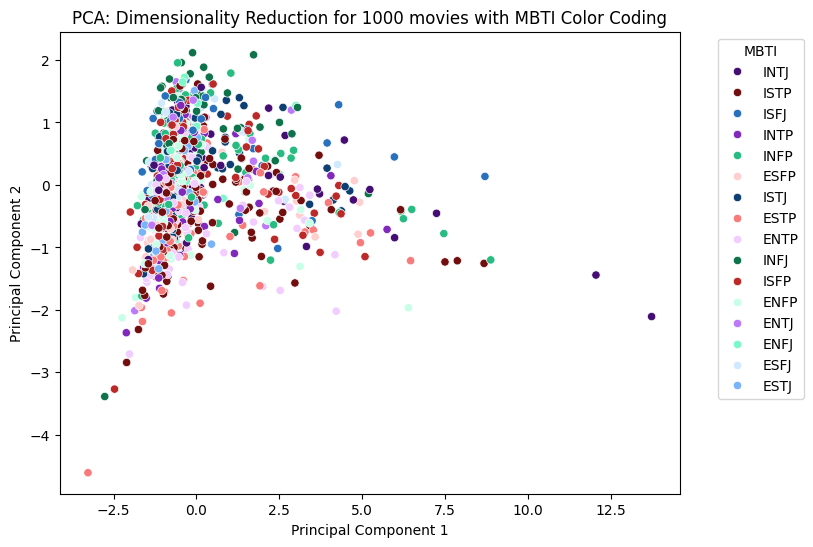

In [103]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_dataset)  # Perform PCA on your dataset

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the 'lead_MBTI' column for color coding
pca_df['lead_MBTI'] = df['lead_MBTI']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Plot the PCA result with color coding based on MBTI types (lead_MBTI) and the custom color scheme
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='lead_MBTI', data=pca_df, palette=mbti_colors)  # Use custom color mapping
plt.title('PCA: Dimensionality Reduction for 1000 movies with MBTI Color Coding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='MBTI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


• The data points appear to be generally clustered in the upper left corner of the figure. This implies that a majority of movies in this category tend to be clustered together based on comparable feature combinations.\
• Across the Principal Component 1 (PC1) axis, the data points are more dispersed compared to PC2. This suggests that a greater percentage of the data volatility is captured by PC1.\
• The lower right corner displays an isolated solitary data point. This might be an anomaly, possibly indicating a picture having distinctive qualities that differ greatly from the bulk of the films.

In [104]:
# Experimenting with 2, 5, and 10 components

n_components_to_try = [2, 5, 10]

for n_components in n_components_to_try:
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(final_dataset)

    explained_variance = pca.explained_variance_ratio_
    print(f"Explained Variance for {n_components} Components: {explained_variance}")

Explained Variance for 2 Components: [0.38322457 0.09206546]
Explained Variance for 5 Components: [0.38322457 0.09206546 0.07961442 0.0694869  0.06612899]
Explained Variance for 10 Components: [0.38322457 0.09206546 0.07961442 0.0694869  0.06612899 0.06408737
 0.05851151 0.05311583 0.04752133 0.04209309]


We can determine how much of the variance of the original dataset each principal component retains by looking at the explained_variance_ratio_. The idea is to use the fewest number of components while preserving the majority of the variance in the data.\
\
As it is shown, the later components provide declining returns whereas the initial few typically account for a sizable amount for the overall variance.

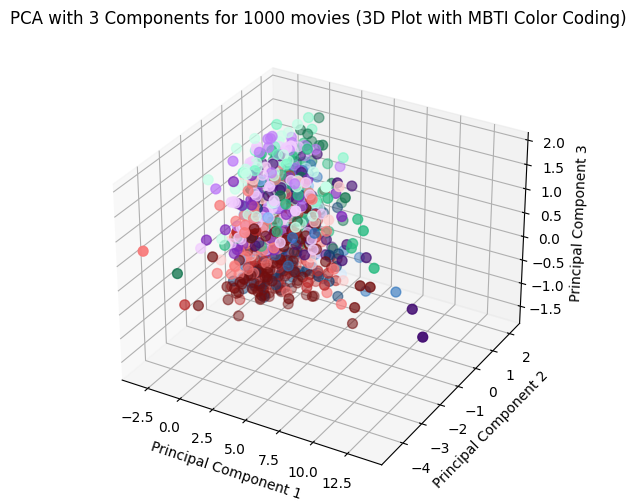

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_dataset)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the 'lead_MBTI' column for color coding
pca_df['lead_MBTI'] = df['lead_MBTI']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Convert MBTI labels to corresponding colors
pca_df['color'] = pca_df['lead_MBTI'].map(mbti_colors)

# Create a 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with MBTI color mapping
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['color'], s=50)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('PCA with 3 Components for 1000 movies (3D Plot with MBTI Color Coding)')
plt.show()


Every data point is associated with a single movie. The plot's placement of it shows how the movie is projected onto the PC1-PC2-PC3 space.\
Near the plot's centre, there appears to be a relatively dense clustering of data points. This implies that, according to the PCA features, a substantial percentage of the films have similar qualities.\
In comparison to PC3, the data points are more dispersed along PC1 and PC2. This suggests that PC1 and PC2 are more crucial in understanding the variations between films since they account for a greater percentage of the variance in the data.\
A few data points that seem to be slightly separated from the main cluster are visible. These are potential outliers—films with distinctive qualities that differ markedly from the bulk of the films.

Movies that are further from the center have more distinguishable traits, whereas those that are close to the center reflect more common characteristics.

In [106]:
df1.isnull().mean()

,0
ï»¿tconst,0.000000
titletype,0.000000
primarytitle,0.000000
originaltitle,0.000000
startyear,0.000000
runtimeminutes,0.000225
genres,0.000000
averagerating,0.000000
numvotes,0.000000
lead_character,0.000000


In [107]:
numerical_features = ['averagerating', 'numvotes', 'lead_votes', 'secondlead_votes']

In [108]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[numerical_features])

In [109]:
lead_mbti_traits = ['lead_I', 'lead_E', 'lead_N', 'lead_S', 'lead_T', 'lead_F', 'lead_J', 'lead_P']

# Initialize the new columns with zeros in the original dataframe
for trait in lead_mbti_traits:
    df1[trait] = 0

# Fill the columns with 1 or 0 based on the MBTI types in 'lead_MBTI'
for index, mbti in df1['lead_MBTI'].items():
    if 'I' in mbti: df1.at[index, 'lead_I'] = 1
    if 'E' in mbti: df1.at[index, 'lead_E'] = 1
    if 'N' in mbti: df1.at[index, 'lead_N'] = 1
    if 'S' in mbti: df1.at[index, 'lead_S'] = 1
    if 'T' in mbti: df1.at[index, 'lead_T'] = 1
    if 'F' in mbti: df1.at[index, 'lead_F'] = 1
    if 'J' in mbti: df1.at[index, 'lead_J'] = 1
    if 'P' in mbti: df1.at[index, 'lead_P'] = 1

df1.head(10)

,ï»¿tconst,titletype,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,lead_character,...,secondlead_votes,relationship,lead_I,lead_E,lead_N,lead_S,lead_T,lead_F,lead_J,lead_P
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,9.3,2934011,Andy Dufresne,...,3807,Enemy,1,0,1,0,1,0,1,0
1,tt0468569,movie,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2914377,Bruce Wayne,...,5942,Enemy,1,0,1,0,1,0,1,0
2,tt1375666,movie,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,2587898,Dominick Cobb,...,2243,Friend,1,0,0,1,1,0,0,1
3,tt0137523,movie,Fight Club,Fight Club,1999,139.0,Drama,8.8,2365490,The Narrator,...,2834,Rival,1,0,0,1,0,1,1,0
4,tt0109830,movie,Forrest Gump,Forrest Gump,1994,142.0,"Drama,Romance",8.8,2294581,Forrest Gump,...,3037,Romantic Interest,1,0,0,1,0,1,1,0
5,tt0110912,movie,Pulp Fiction,Pulp Fiction,1994,154.0,"Crime,Drama",8.9,2253465,Vincent Vega,...,1946,Other,1,0,0,1,1,0,0,1
6,tt0816692,movie,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.7,2150423,Joseph Cooper,...,2726,Rival,1,0,0,1,1,0,0,1
7,tt0133093,movie,The Matrix,The Matrix,1999,136.0,"Action,Sci-Fi",8.7,2083555,Neo,...,628,Enemy,1,0,1,0,1,0,0,1
8,tt0068646,movie,The Godfather,The Godfather,1972,175.0,"Crime,Drama",9.2,2044974,Michael Corleone,...,1613,Enemy,1,0,1,0,1,0,1,0
9,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action,Adventure,Drama",8.9,2036116,Frodo Baggins,...,541,Enemy,1,0,1,0,0,1,0,1


In [110]:
second_lead_mbti_traits = ['secondlead_I', 'secondlead_E', 'secondlead_N', 'secondlead_S', 'secondlead_T', 'secondlead_F', 'secondlead_J', 'secondlead_P']

# Initialize the new columns with zeros in the original dataframe
for trait in second_lead_mbti_traits:
    df1[trait] = 0

# Fill the columns with 1 or 0 based on the MBTI types in 'lead_MBTI'
for index, mbti in df1['secondlead_MBTI'].items():
    if 'I' in mbti: df1.at[index, 'secondlead_I'] = 1
    if 'E' in mbti: df1.at[index, 'secondlead_E'] = 1
    if 'N' in mbti: df1.at[index, 'secondlead_N'] = 1
    if 'S' in mbti: df1.at[index, 'secondlead_S'] = 1
    if 'T' in mbti: df1.at[index, 'secondlead_T'] = 1
    if 'F' in mbti: df1.at[index, 'secondlead_F'] = 1
    if 'J' in mbti: df1.at[index, 'secondlead_J'] = 1
    if 'P' in mbti: df1.at[index, 'secondlead_P'] = 1

df1.head(10)

,ï»¿tconst,titletype,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,lead_character,...,lead_J,lead_P,secondlead_I,secondlead_E,secondlead_N,secondlead_S,secondlead_T,secondlead_F,secondlead_J,secondlead_P
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,1994,142.0,Drama,9.3,2934011,Andy Dufresne,...,1,0,0,1,0,1,1,0,1,0
1,tt0468569,movie,The Dark Knight,The Dark Knight,2008,152.0,"Action,Crime,Drama",9.0,2914377,Bruce Wayne,...,1,0,0,1,1,0,1,0,0,1
2,tt1375666,movie,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,2587898,Dominick Cobb,...,0,1,1,0,0,1,1,0,1,0
3,tt0137523,movie,Fight Club,Fight Club,1999,139.0,Drama,8.8,2365490,The Narrator,...,1,0,0,1,1,0,1,0,0,1
4,tt0109830,movie,Forrest Gump,Forrest Gump,1994,142.0,"Drama,Romance",8.8,2294581,Forrest Gump,...,1,0,0,1,0,1,0,1,0,1
5,tt0110912,movie,Pulp Fiction,Pulp Fiction,1994,154.0,"Crime,Drama",8.9,2253465,Vincent Vega,...,0,1,0,1,1,0,1,0,1,0
6,tt0816692,movie,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.7,2150423,Joseph Cooper,...,0,1,0,1,1,0,0,1,1,0
7,tt0133093,movie,The Matrix,The Matrix,1999,136.0,"Action,Sci-Fi",8.7,2083555,Neo,...,0,1,1,0,1,0,1,0,1,0
8,tt0068646,movie,The Godfather,The Godfather,1972,175.0,"Crime,Drama",9.2,2044974,Michael Corleone,...,1,0,0,1,1,0,1,0,1,0
9,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action,Adventure,Drama",8.9,2036116,Frodo Baggins,...,0,1,0,1,1,0,1,0,1,0


In [111]:
lead_mbti_traits = ['lead_I', 'lead_E', 'lead_N', 'lead_S', 'lead_T', 'lead_F', 'lead_J', 'lead_P']
second_lead_mbti_traits = ['secondlead_I', 'secondlead_E', 'secondlead_N', 'secondlead_S', 'secondlead_T', 'secondlead_F', 'secondlead_J', 'secondlead_P']


final_dataset = np.hstack([scaled_data, df1[lead_mbti_traits].values, df1[second_lead_mbti_traits].values])

# 16 columns (4 numerical + 8 MBTI for lead + 8 MBTI for second lead)

In [112]:
columns = numerical_features + lead_mbti_traits + second_lead_mbti_traits
final_df1 = pd.DataFrame(final_dataset, columns=columns)

# Display the first few rows of the final dataset
print(final_df1.head())
final_df1.shape

   averagerating   numvotes  lead_votes  secondlead_votes  lead_I  lead_E  \
0       2.644520  11.814448   13.807414         13.707122     1.0     0.0   
1       2.340301  11.731110   12.607304         21.712542     1.0     0.0   
2       2.137489  10.345340   10.301051          7.842729     1.0     0.0   
3       2.137489   9.401308   -0.156290         10.058750     1.0     0.0   
4       2.137489   9.100329    9.458020         10.819921     1.0     0.0   

   lead_N  lead_S  lead_T  lead_F  lead_J  lead_P  secondlead_I  secondlead_E  \
0     1.0     0.0     1.0     0.0     1.0     0.0           0.0           1.0   
1     1.0     0.0     1.0     0.0     1.0     0.0           0.0           1.0   
2     0.0     1.0     1.0     0.0     0.0     1.0           1.0           0.0   
3     0.0     1.0     0.0     1.0     1.0     0.0           0.0           1.0   
4     0.0     1.0     0.0     1.0     1.0     0.0           0.0           1.0   

   secondlead_N  secondlead_S  secondlead_T  secon

(4435, 20)

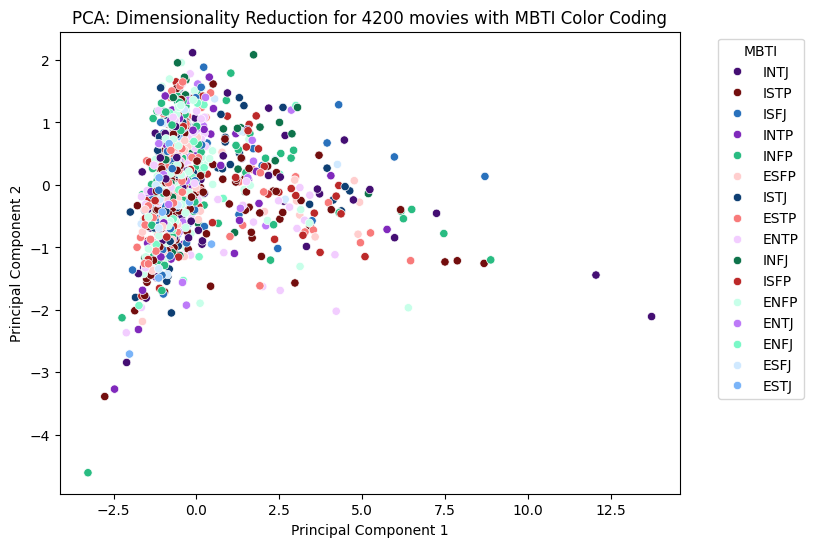

In [113]:

pca_df1 = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])  # Now using 3 components

# Add the 'lead_MBTI' column to the PCA result DataFrame for color coding
pca_df1['lead_MBTI'] = df1['lead_MBTI']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Plot the PCA result with color coding based on MBTI types (lead_MBTI) and the custom color scheme
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='lead_MBTI', data=pca_df1, palette=mbti_colors)  # Use custom color mapping
plt.title('PCA: Dimensionality Reduction for 4200 movies with MBTI Color Coding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='MBTI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [114]:
# Experimenting with 2, 5, and 10 components

n_components_to_try = [2, 5, 10]

for n_components in n_components_to_try:
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(final_dataset)

    explained_variance = pca.explained_variance_ratio_
    print(f"Explained Variance for {n_components} Components: {explained_variance}")

Explained Variance for 2 Components: [0.36631018 0.11136075]
Explained Variance for 5 Components: [0.36631018 0.11136075 0.10680669 0.06833733 0.06169016]
Explained Variance for 10 Components: [0.36631018 0.11136075 0.10680669 0.06833733 0.06169016 0.05698932
 0.0512279  0.04714269 0.04533902 0.04168247]


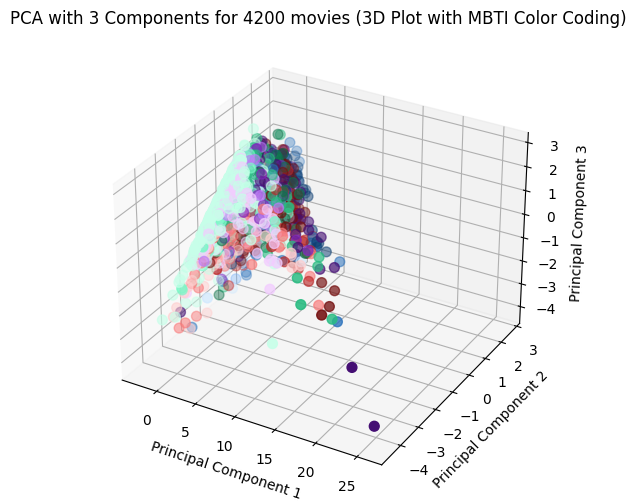

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_dataset)

# Convert the PCA result into a DataFrame
pca_df1 = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the 'lead_MBTI' column for color coding
pca_df1['lead_MBTI'] = df1['lead_MBTI']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Convert MBTI labels to corresponding colors
pca_df1['color'] = pca_df1['lead_MBTI'].map(mbti_colors)

# Create a 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with MBTI color mapping
ax.scatter(pca_df1['PC1'], pca_df1['PC2'], pca_df1['PC3'], c=pca_df1['color'], s=50)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('PCA with 3 Components for 4200 movies (3D Plot with MBTI Color Coding)')
plt.show()